# Proyecto de aprendizaje supervisado

# Importar librerías

In [49]:
# Importar librerías de Python
import warnings

# Importar librerías 3rd party
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler

# Configuración de gráficos
warnings.filterwarnings('ignore')

# Dataset e introducción

El dataset [Cardiovascular Disease Dataset](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset)
fue obtenido de Kaggle y contiene información de pacientes con enfermedades cardiovasculares.

Las variables son las siguientes:

| Variable  | Descripción                                                                |
|-----------|----------------------------------------------------------------------------|
| sbp       | Presión sanguínea sistólica                                                |
| tobacco   | Consumo de tabaco                                                          |
| ldl       | Colesterol LDL                                                             |
| adiposity | Adiposidad, medida por el índice de masa corporal                          |
| famhist   | Historial familiar de enfermedades cardiovasculares                        |
| typea     | Tipo de personalidad A                                                     |
| obesity   | Obesidad                                                                   |
| alcohol   | Consumo de alcohol                                                         |
| age       | Edad                                                                       |
| chd       | Enfermedad coronaria (1 si la persona tiene enfermedad coronaria, 0 si no) |

El objetivo es predecir si una persona tiene enfermedad coronaria o no, basándonos en las variables dadas.
Para esto, se realizará un pequeño analysis exploratorio de los datos, 
buscando correlaciones entre las variables,
y se utilizan modelos de aprendizaje supervisado para predecir si una persona tiene enfermedad coronaria o no.

# Cargar el dataset

Primero, cargamos el dataset y mostramos las primeras 5 filas.
Esto nos permite ver cómo está estructurado el dataset y qué tipo de datos contiene.
Se ha renombrado el archivo del dataset a 'data.csv' para facilitar su uso.

In [50]:
df = pd.read_csv('../data/raw/reto_1.csv')
df.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


# Exploración del dataset

Para poder entender mejor el dataset, utilizamos el método info() y describe().
También se utiliza el método duplicated() para verificar si hay valores duplicados.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


In [52]:
df.describe()

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,231.935065,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,133.938585,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,1.000000,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,116.250000,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,231.500000,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,347.750000,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,463.000000,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [53]:
df.duplicated().sum()

0

El dataset parece no tener valores nulos, por lo que no es necesario hacer limpieza de datos,
sin embargo, existe una columna llamada 'row.names' la cual solo contiene el índice de cada fila, 
por lo que se puede eliminar.

In [54]:
df.drop(columns=['row.names'], inplace=True)

Por último, revisamos los nombres de las columnas para asegurarnos de que no haya espacios en blanco.

In [55]:
df.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')

# Scatter matrix y correlaciones

Utilizando la libreria seaborn, se puede crear una matriz de disperación para visualizar las correlaciones entre las variables. También, se puede utilizar el método corr() para obtener las correlaciones entre las variables.

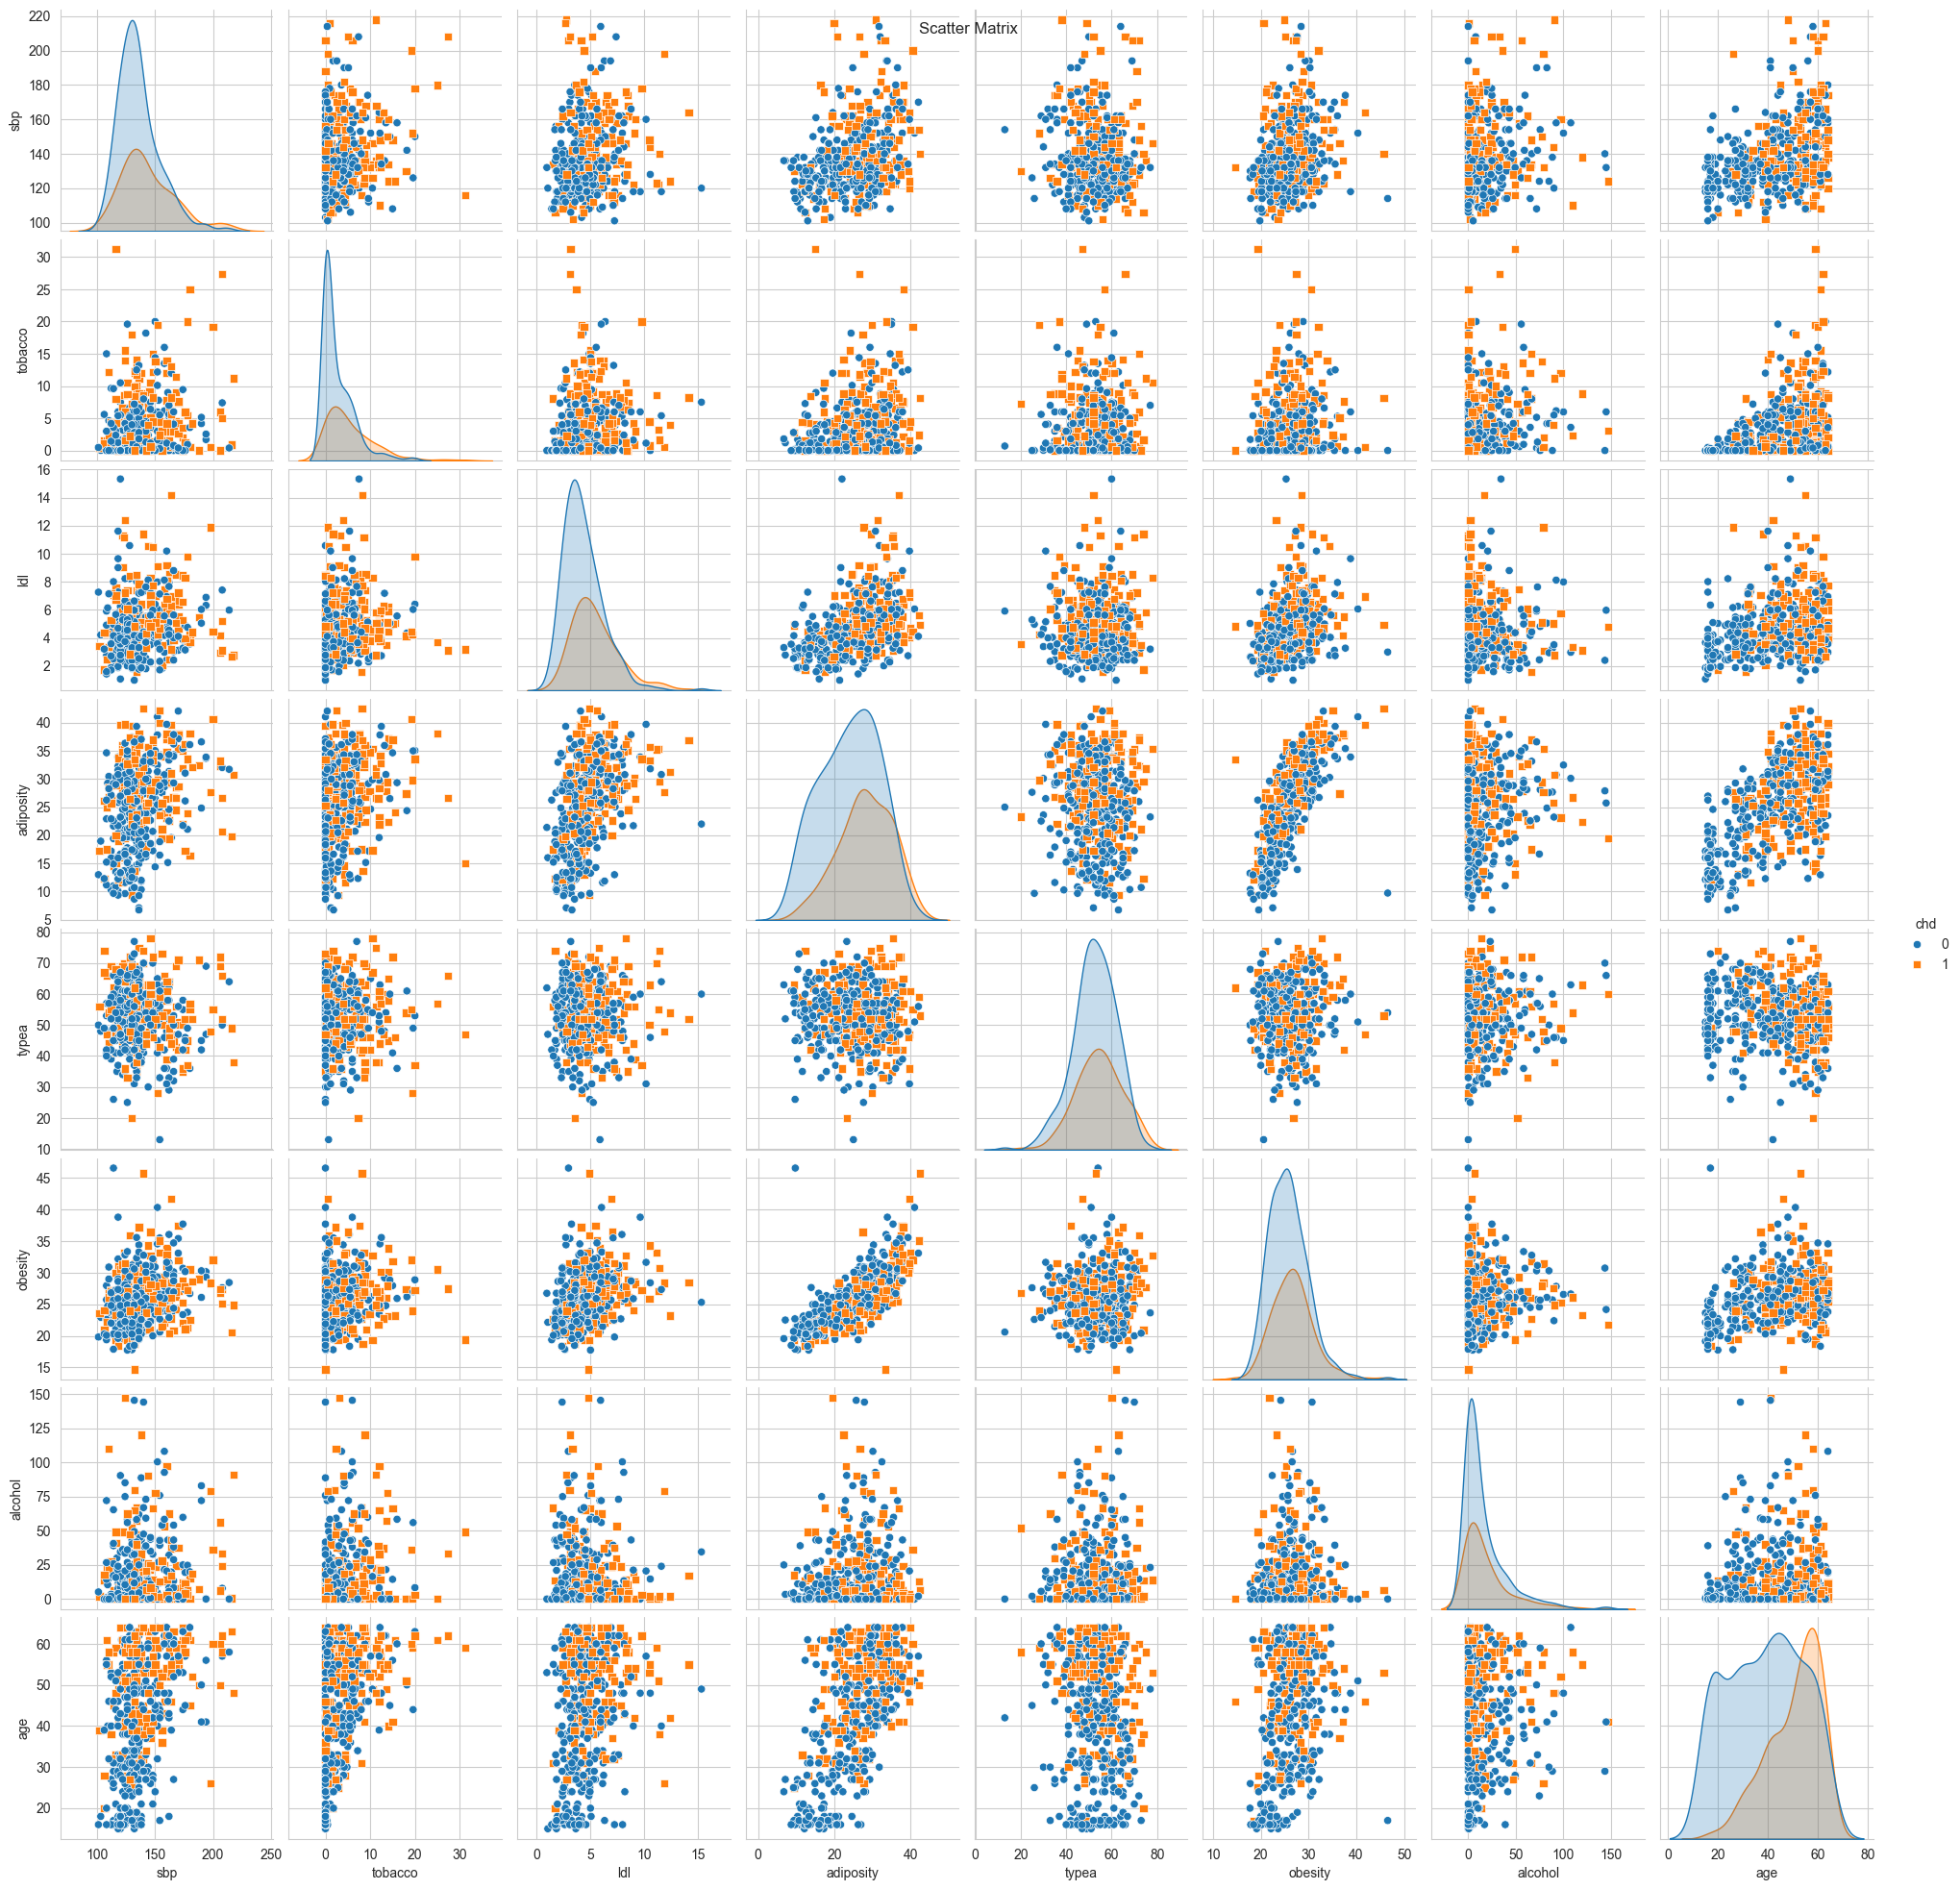

In [56]:
scatter_matrix = sns.pairplot(df, hue='chd', markers=['o', 's', 'D'])
plt.suptitle('Scatter Matrix')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

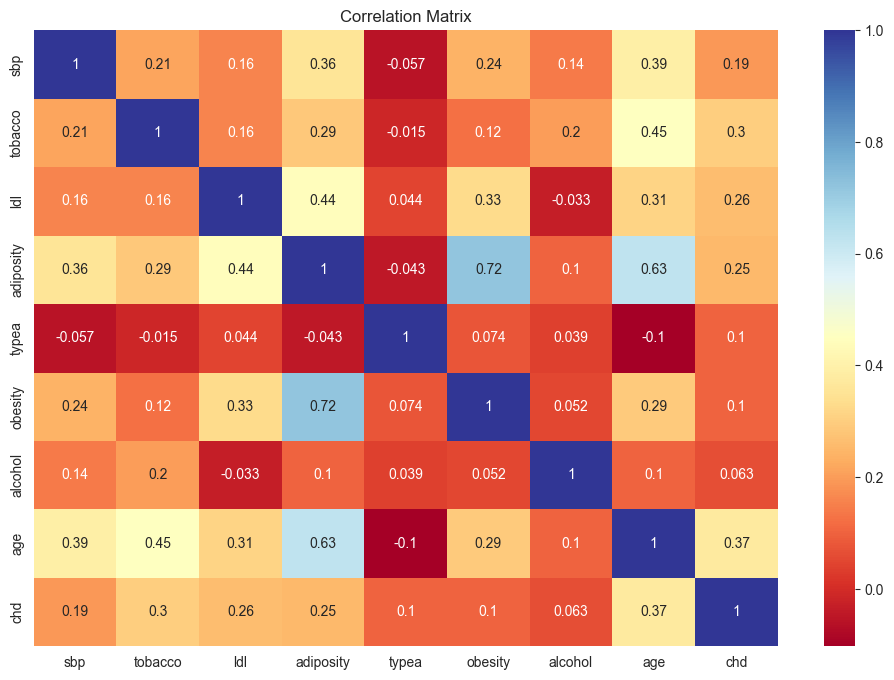

In [57]:
correlation_matrix = df.drop(columns='famhist').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu')
plt.title('Correlation Matrix')

# Interpretación de la matriz de correlaciones

Se puede observar que todas las variables tienen una relación positiva con la enfermedad coronaria,
las mas destacables siendo 'age', 'tobacco', 'ldl' y 'adiposity'.

La variable 'famhist' es la única variable categórica, por lo que no aparece en la matriz de correlaciones.

# Modelos de aprendizaje supervisado

Para poder procesar los datos a través de los modelos de aprendizaje supervisado, es necesario convertir la variable categórica 'famhist' a una variable numérica. 
Para esto se utiliza la función get_dummies() de pandas.

In [58]:
df = pd.get_dummies(df, columns=['famhist'], drop_first=True)
df.head()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist_Present
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1,True
1,144,0.01,4.41,28.61,55,28.87,2.06,63,1,False
2,118,0.08,3.48,32.28,52,29.14,3.81,46,0,True
3,170,7.50,6.41,38.03,51,31.99,24.26,58,1,True
4,134,13.60,3.50,27.78,60,25.99,57.34,49,1,True


La columna famhist fue cambiada a la columna famhist_Present, True si hay historial familiar, False si no.

## Random Forest Classifier

El random forest classifier (rfc) es un algoritmo de aprendizaje automático que combina múltiples árboles de decisión para mejorar la precisión predictiva. 
Cada árbol se entrena con una muestra aleatoria de datos y características, y luego se promedian las predicciones de los árboles individuales.
Es versátil, robusto y ampliamente utilizado en problemas de clasificación y regresión.
Se utilizan las libraries de scikit learn para este modelo

In [59]:
# Copiamos el dataframe para no modificar el original
df_rfc = df.copy()

In [60]:
# Obtener una parte de los datos para entrenar el modelo
df_rfc_sample = df_rfc.sample(frac=1, random_state=42)

# Normalizar los datos
scaler = RobustScaler()
scaled_df = scaler.fit_transform(df_rfc_sample.drop(columns='chd'))

# Convertir los datos normalizados a un dataframe
df_rfc_scaled = pd.DataFrame(scaled_df, columns=df_rfc_sample.drop(columns='chd').columns)

# Mostrar los datos normalizados
df_rfc_scaled.head()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,famhist_Present
0,0.375000,0.558054,0.207378,-0.220476,0.384615,-0.202268,0.479418,-0.125000,0.0
1,0.083333,0.095457,-0.155533,-0.042349,-0.153846,-0.715646,-0.321180,0.000000,0.0
2,0.083333,1.688848,0.586241,0.500764,1.692308,0.340136,0.659895,0.541667,1.0
3,0.416667,0.073428,1.511466,0.829077,-0.538462,0.285714,0.250615,0.625000,0.0
4,0.791667,1.064709,-0.151545,-0.033617,0.076923,0.019048,0.834812,0.000000,0.0


Una vez normalizados los datos, se dividen los datos de entrenamiento y prueba. En este caso se utiliza un 80% de los datos escalados para el entrenamiento y un 20% para la prueba.

In [61]:
# Dividir los datos en variables independientes y dependientes
X = df_rfc_scaled
y = df_rfc_sample['chd']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Obtención de hiperparámetros y entrenamiento del modelo

Antes de entrenar el modelo, se deben obtener los hiperparámetros que se utilizarán.
Para esto, se utiliza la clase RandomForestClassifier de scikit learn y GridSearchCV para encontrar los mejores hiperparámetros.

In [62]:
# Parámetros a probar
param_grid = {
    'n_estimators': [10, 30, 60, 100],
    'max_depth': [1, 2, 3, 5, 7],
    'max_features': ['auto', 'sqrt', 'log2', None],

    # Parámetros adicionales
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Entrenar el modelo
rfc_grid = GridSearchCV(RandomForestClassifier(random_state=1),
                        param_grid=param_grid,
                        return_train_score=True)

# Ajustar el modelo
rfc_grid.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print(f'Best parameters: {rfc_grid.best_params_}')

Best parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}


Una vez divididos los datos, y obtenidos los hiperparámetros se crean la clase de Random Forest Classifier y se entrena el modelo. 
Utilizamos los hiperparámetros obtenidos anteriormente.

In [63]:
# Separamos el mejor modelo
rfc_model = rfc_grid.best_estimator_

In [64]:
rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred)}')

Accuracy: 0.7204301075268817
Precision: 0.5789473684210527
Recall: 0.3793103448275862
F1 Score: 0.4583333333333333
ROC AUC Score: 0.627155172413793


El modelo de Random Forest Classifier tiene un accuracy que varía entre 0.7 y 0.75, lo que indica que el modelo es capaz de predecir correctamente si una persona tiene enfermedad coronaria o no en un 70-75% de los casos. Si bien el modelo no es precisamente malo, podría ser mejor. Generalmente para considerar un modelo como bueno, se necesita alrededor de un 80% de accuracy, existen muchos factores que pueden influir en el resultado, como la cantidad de datos, la calidad de los datos, la elección de hiperparámetros, entre otros.

Finalmente, se visualiza la matriz de confusión, con el fin de observar los resultados del modelo como verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

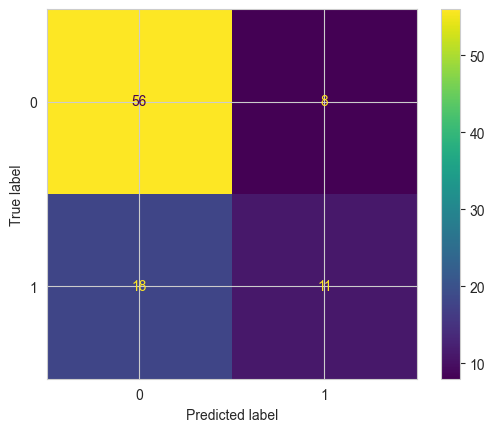

In [65]:
conf_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## K-Nearest Neighbors

El algoritmo k-Nearest Neighbors (k-NN) es un método de aprendizaje automático supervisado utilizado para clasificación y regresión. Funciona calculando la distancia entre un punto de datos de prueba y todos los puntos de datos de entrenamiento, seleccionando los `k` puntos más cercanos, y luego prediciendo la clase (en clasificación) o el valor (en regresión) basándose en la mayoría o el promedio de las etiquetas de los vecinos más cercanos.

In [66]:
# Copiamos el dataframe para no modificar el original
df_knn = df.copy()

In [67]:
# Obtener una parte de los datos para entrenar el modelo
df_knn_sample = df_knn.sample(frac=1, random_state=42)

# Normalizar los datos
scaler = RobustScaler()
scaled_df = scaler.fit_transform(df_knn_sample.drop(columns='chd'))

# Convertir los datos normalizados a un dataframe
df_knn_scaled = pd.DataFrame(scaled_df, columns=df_knn_sample.drop(columns='chd').columns)

# Mostrar los datos normalizados
df_knn_scaled.head()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,famhist_Present
0,0.375000,0.558054,0.207378,-0.220476,0.384615,-0.202268,0.479418,-0.125000,0.0
1,0.083333,0.095457,-0.155533,-0.042349,-0.153846,-0.715646,-0.321180,0.000000,0.0
2,0.083333,1.688848,0.586241,0.500764,1.692308,0.340136,0.659895,0.541667,1.0
3,0.416667,0.073428,1.511466,0.829077,-0.538462,0.285714,0.250615,0.625000,0.0
4,0.791667,1.064709,-0.151545,-0.033617,0.076923,0.019048,0.834812,0.000000,0.0


Una vez normalizados los datos, se dividen los datos de entrenamiento y prueba. 
En este caso se utiliza un 80% de los datos escalados para el entrenamiento y un 20% para la prueba.
También, se integra el atributo `cv` en el método `GridSearchCV` para realizar validación cruzada.

In [68]:
# Dividir los datos en variables independientes y dependientes
X = df_knn_scaled
y = df_knn_sample['chd']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parámetros a probar
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2]
}

# Entrenar el modelo
knn_grid = GridSearchCV(KNeighborsClassifier(),
                        param_grid=param_grid,
                        return_train_score=True,
                        cv=5)

# Ajustar el modelo
knn_grid.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print(f'Best parameters: {knn_grid.best_params_}')

Best parameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 25, 'p': 1, 'weights': 'uniform'}


Una vez divididos los datos, y obtenidos los hiperparámetros se crean la clase de K-Nearest Neighbors y se entrena el modelo. 
Utilizamos los hiperparámetros obtenidos anteriormente.

In [69]:
# Separamos el mejor modelo
knn_model = knn_grid.best_estimator_

In [70]:
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred)}')

Accuracy: 0.7419354838709677
Precision: 0.7272727272727273
Recall: 0.27586206896551724
F1 Score: 0.4
ROC AUC Score: 0.6144935344827587


El modelo de K-Nearest Neighbors tiene un accuracy que está arriba de 0.7, lo que indica que el modelo es capaz de predecir correctamente si una persona tiene enfermedad coronaria o no en un 70% de los casos. Finalmente, se visualiza la matriz de confusión, con el fin de observar los resultados del modelo como verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

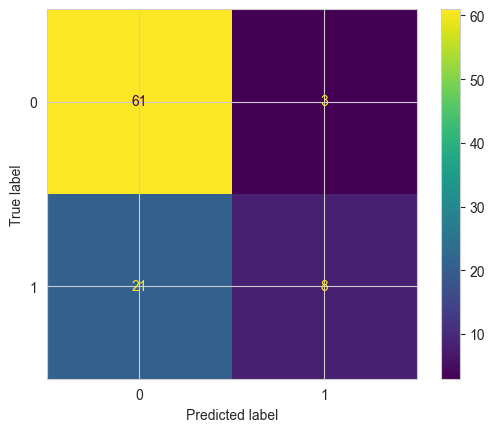

In [71]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Curva ROC (RFC vs KNN)

Una curva ROC (Receiver Operating Characteristic) es una gráfica que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. Esta curva representa dos parámetros:

- Tasa de verdaderos positivos
- Tasa de falsos positivos

La curva ROC nos permite ver qué tan bueno es el modelo para distinguir entre dos clases.

<Figure size 640x480 with 0 Axes>

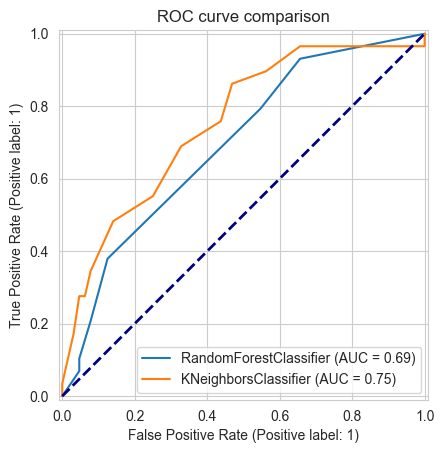

In [72]:
from sklearn.metrics import RocCurveDisplay

plt.figure()
disp_rfc = RocCurveDisplay.from_estimator(rfc_model, X_test, y_test)
disp_knn = RocCurveDisplay.from_estimator(knn_model, X_test, y_test, ax=disp_rfc.ax_)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("ROC curve comparison")
plt.legend(loc="lower right")
plt.show()

# Conclusión

Basándose en los resultados obtenidos de los modelos de clasificación RFC y KNN, se puede concluir que los dos modelos presentan un rendimiento aceptable, aunque con un accuracy variado y con un margen de mejora.

Es importante destacar que el modelo KNN obtuvo mejores resultados, con un accuracy de 0.75, mientras que el modelo RFC obtuvo un accuracy de 0.7. Los resultados pueden variar dependiendo de los datos.

Se observó que la selección de los hiperparámetros tiene un gran impacto sobre el rendimiento de los modelos, por lo que probar más variaciones de hiperparámetros podría mejorar el rendimiento de los modelos.

Finalmente, si se tuviera que escoger un modelo para predecir enfermedades coronarias, se escogería el modelo KNN, ya que obtuvo mejores resultados.